## Proyecto  – Analisis Peliculas

## 1. Lectura, limpieza y transformacion

Bienvenid@  esta parte del proyecto estara enfocada al estudio y analisis del dataset correspondiente a peliculas de modo que analicemos colecciones de peliculas y mediante la observacion de su rendimiento, sacar conclusiones para las problematicas planteadas. En esta ocasion trabajaremos con el dataset llamado "The Movies Dataset" disponible en Kaggle a traves de https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv.

Primero importaremos las librerias necesarias para el analisis:

In [539]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast # Necesario para leer el texto de la colección ya que es un JSON anidado
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Ahora leeremos el dataset que tenemos para inspeccionarlo, limpiarlo y transformarlo para el analisis posterior.

In [ ]:
df_peliculas = pd.read_csv(os.path.join("data","movies_metadata.csv"), low_memory=False) #low_memory debido a la gran cantidad de datos mixtos que posee el dataset
df_peliculas

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


Ahora inspeccionemos el dataframe:

In [541]:
df_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [542]:
df_peliculas.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

De este modo observamos que existen muchos datos nulos en nuestro dataset. Por un lado tenemos cantidades menores, pero por el otro tenemos gran cantidad de datos nulos en las columnas "tagline" que corresponde al eslogan de la pelicula, "homepage" que corresponde a la url de la pagina oficial de la pelicula y finalmente "belongs_to_collection" la cual es normal que tenga tantos nulos ya que corresponde a la coleccion a la cual pertenece la pelicula y muchas peliculas de nuestro dataset solo poseen una entrega.

En esto en particular debido al enfoque del proyecto solo eliminare los nulos de las columnas "belongs_to_collection" debido a que estamos analizando colecciones de peliculas y comparando el rendimiento de estas. Por otro lado tambien eliminare los nulos de "title", "release_date", "vote_average" y "vote_count" ya que considero informacion esencial para el analisis. Finalmente destacar que creare un dataframe que solo contenga informacion de las columnas que considere relevantes para el analisis.

In [543]:
columnas_de_interes = ['belongs_to_collection','title','release_date','vote_average','vote_count',"popularity", "genres","budget","revenue"] #Solo trabajaremos con estas columnas de momento
df_peliculas = df_peliculas[columnas_de_interes]

Ahora procederemos con la limpieza:

In [544]:
df_peliculas = df_peliculas.dropna(subset=columnas_de_interes)


Considere adecuado convertir la columna de conteo de votos a int ya que no hay medios votos y ademas la columna "release_date" contiene unicamente fechas asi que pense el por que no convertirlo a un objeto Datetime

In [545]:
df_peliculas["vote_count"] = df_peliculas["vote_count"].astype(int) 
df_peliculas["release_date"] = pd.to_datetime(df_peliculas['release_date'], errors='coerce') 
#En este momento nuestro dataframe se ve tal que asi
df_peliculas

,belongs_to_collection,title,release_date,vote_average,vote_count,popularity,genres,budget,revenue
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",Toy Story,1995-10-30,7.7,5415,21.946943,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,373554033.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",Grumpier Old Men,1995-12-22,6.5,92,11.7129,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",Father of the Bride Part II,1995-02-10,5.7,173,8.387519,"[{'id': 35, 'name': 'Comedy'}]",0,76578911.0
9,"{'id': 645, 'name': 'James Bond Collection', '...",GoldenEye,1995-11-16,6.6,1194,14.686036,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",58000000,352194034.0
12,"{'id': 117693, 'name': 'Balto Collection', 'po...",Balto,1995-12-22,7.1,423,12.140733,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",0,11348324.0
...,...,...,...,...,...,...,...,...,...
45355,"{'id': 37261, 'name': 'The Carry On Collection...",Carry On Follow That Camel,1967-09-01,6.1,19,1.114848,"[{'id': 35, 'name': 'Comedy'}]",0,0.0
45358,"{'id': 37261, 'name': 'The Carry On Collection...",Carry On Camping,1969-05-29,6.5,25,4.103723,"[{'id': 35, 'name': 'Comedy'}]",0,0.0
45369,"{'id': 37261, 'name': 'The Carry On Collection...",Carry On England,1976-10-01,4.8,15,0.846154,"[{'id': 35, 'name': 'Comedy'}]",0,0.0
45371,"{'id': 477208, 'name': 'DC Super Hero Girls Co...",LEGO DC Super Hero Girls: Brain Drain,2017-08-30,10.0,2,8.413734,"[{'id': 16, 'name': 'Animation'}]",0,0.0


Ahora nos gustaria obtener la informacion de las colecciones para si poder agrupar las peliculas segun a la coleccion que pertenezcan. Observemos que la columna de las colecciones esta en formato JSON por lo que debemos buscar una manera de extraer esta informacion.

Defini la siguiente funcion con la ayuda de gemini que me ayuda a acceder al JSON el cual contiene bajo la llave de "name" el nombre de la coleccion a la cual pertenece, para esto uso la libreria ast para acceder al valor de cada fila en la columnas.

In [546]:
def extraer_nombre_saga(valor_celda):
    datos_coleccion = ast.literal_eval(str(valor_celda))
    if isinstance(datos_coleccion, dict) and 'name' in datos_coleccion:
        return datos_coleccion['name'] # Devolvemos solo el nombre 
# Le aplico la funcion a cada fila considerando que no hay nulos
df_peliculas["nombre_coleccion"] = df_peliculas["belongs_to_collection"].apply(extraer_nombre_saga)
# Elimino la columna ya que ya no me sirve
df_peliculas = df_peliculas.drop(columns="belongs_to_collection")


Ahora me interesa ordenar las peliculas segun su lugar en la coleccion (Ej: Ordenar Toy Story 1,2,3,etc.)

In [547]:
df_peliculas = df_peliculas.sort_values(by=["nombre_coleccion", "release_date"]) # Ordenamos segun fecha de lanzamiento dentro de cada coleccion
df_peliculas["numero_en_saga"] = df_peliculas.groupby("nombre_coleccion").cumcount() + 1 # vamos sumando de 1 en 1

Ahora indagaremos en los generos de las peliculas de modo que encontremos algun factor presente en la eleccion del genero.
Adaptemos la funcion de antes que extraia el titulo de la coleccion pero ahora que extraiga mas de un nombre que en este caso son los generos de las peliculas

In [548]:
def extraer_generos(valor_celda):
    s_valor = str(valor_celda)   
    datos = ast.literal_eval(s_valor)
    if isinstance(datos, list):
        lista_generos = [genero['name'] for genero in datos if 'name' in genero]
        return lista_generos

Apliquemos la funcion:

In [549]:
df_peliculas["genres"] = df_peliculas["genres"].apply(extraer_generos)


De este modo observamos que la columna de generos corresponde a listas mucho mas abordables que el formato JSON

Finalmente nuestro dataframe listo para trabajar quedaria asi (Observamos que cada pelicula tiene su coleccion asociada gracias a la funcion) :

In [550]:
df_peliculas

,title,release_date,vote_average,vote_count,popularity,genres,budget,revenue,nombre_coleccion,numero_en_saga
20620,Olympus Has Fallen,2013-03-20,6.2,3010,10.978188,"[Action, Thriller]",70000000,161025640.0,... Has Fallen Collection,1
36252,London Has Fallen,2016-03-02,5.8,1656,15.037993,"[Action, Crime, Thriller]",60000000,205754447.0,... Has Fallen Collection,2
38097,00 Schneider - Jagd auf Nihil Baxter,1994-12-21,6.5,16,1.931299,"[Comedy, Crime]",0,0.0,00 Schneider Filmreihe,1
33056,08/15,1954-09-30,5.9,4,0.628127,"[War, Drama]",0,0.0,08/15 Collection,1
7320,100 Girls,2000-09-01,5.6,119,5.136537,"[Comedy, Drama, Romance]",0,0.0,100 Girls Collection,1
...,...,...,...,...,...,...,...,...,...,...
15182,"Tora-san, Our Lovable Tramp",1969-08-27,7.0,2,0.116077,"[Foreign, Comedy]",0,0.0,男はつらいよ シリーズ,1
15244,Tora-san's Love Call,1971-12-29,0.0,0,3.8e-05,[Comedy],0,0.0,男はつらいよ シリーズ,2
15243,Tora-san's Rise and Fall,1975-08-19,0.0,0,0.000589,[Comedy],0,0.0,男はつらいよ シリーズ,3
40965,Le Grand Chef,2007-10-31,5.0,3,0.157941,"[Drama, Comedy, Foreign]",0,0.0,식객 시리즈,1


## 2. EDA

Ahora con seaborn y matplotlib visualizaremos mediante graficos posibles tendencias entre nuestras variables del dataset.
Primero debido a la cantidad de peliculas y colecciones, utilizaremos las 10 peliculas mas votadas en "vote_count" y la coleccion a la que pertenezcan.


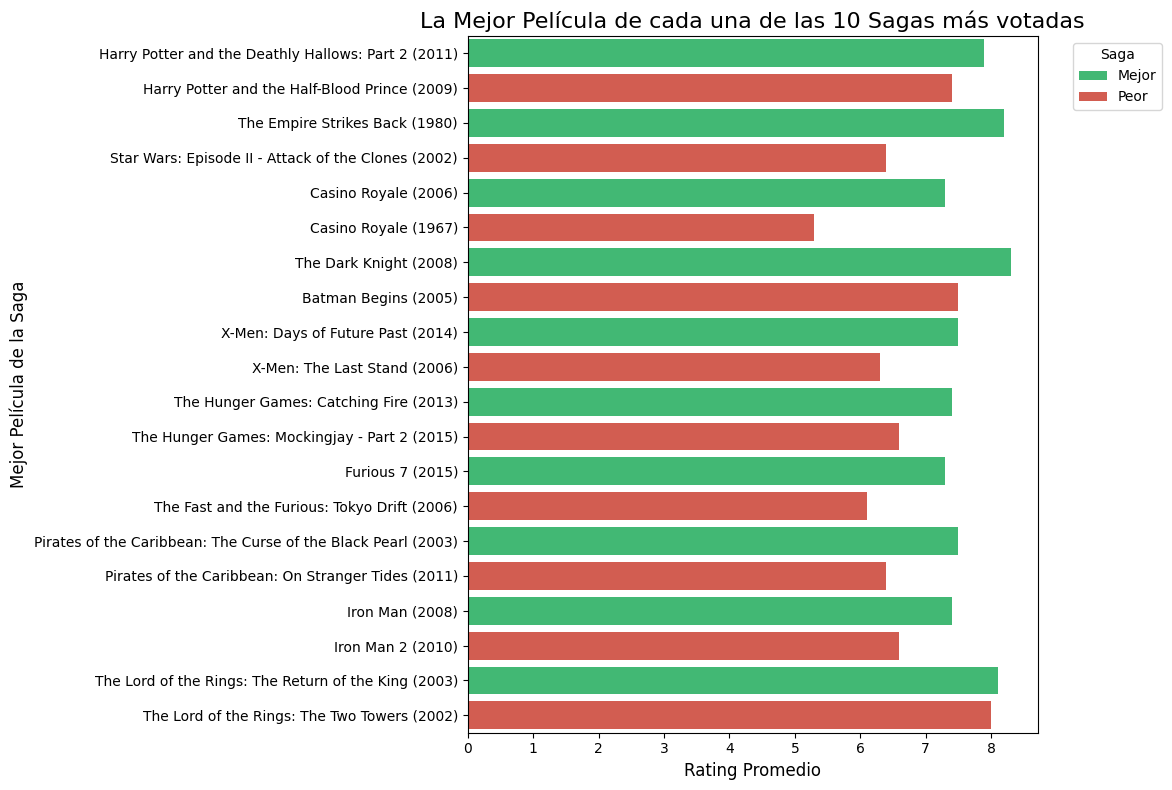

In [551]:
# Agrupamos segun coleccion, tomamos su cantidad de votos de mayor a menor y nos quedamos con las 10 colecciones mas votada
df_top10 = df_peliculas.groupby("nombre_coleccion")["vote_count"].sum().sort_values(ascending=False).head(10)
sagas_top10 = df_top10.index.tolist() # Pasamos los nombres de las colecciones a lista para iterarlas

# Buscamos la mejor pelicula de cada coleccion
lista_peliculas = []
for saga in sagas_top10:
    df_saga = df_peliculas[df_peliculas["nombre_coleccion"] == saga].copy()
    df_saga = df_saga.sort_values("vote_average", ascending=False)
    mejor = df_saga.iloc[0].copy()
    mejor["clasificacion"] = "Mejor" 
    peor = df_saga.iloc[-1].copy()
    peor["clasificacion"] = "Peor"  
    # Formato de título bonito 
    for peli in [mejor, peor]:
        year = str(int(peli["release_date"].year))
        peli["titulo_con_fecha"] = f"{peli["title"]} ({year})"
        lista_peliculas.append(peli)

# Pasamos las mejores peliculas de cada coleccion a un dataframe para graficar
df_grafico_final = pd.DataFrame(lista_peliculas)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="vote_average",   
    y="titulo_con_fecha", 
    data=df_grafico_final,
    palette={"Mejor": "#2ecc71", "Peor": "#e74c3c"},
    hue="clasificacion"
)

plt.title("La Mejor Película de cada una de las 10 Sagas más votadas", fontsize=16)
plt.xlabel("Rating Promedio", fontsize=12)
plt.ylabel("Mejor Película de la Saga", fontsize=12)
plt.legend(title="Saga", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()




Tal como se esperaba no hay una diferencia significativa entre la mejor y peor pelicula de las 10 colecciones mas famodas y votadas.
Antes de descartar la popularidad como factor de fracaso, veamos con las 10 peliculas menos votadas pero que al menos tengan 100 votos para que tenga sentido

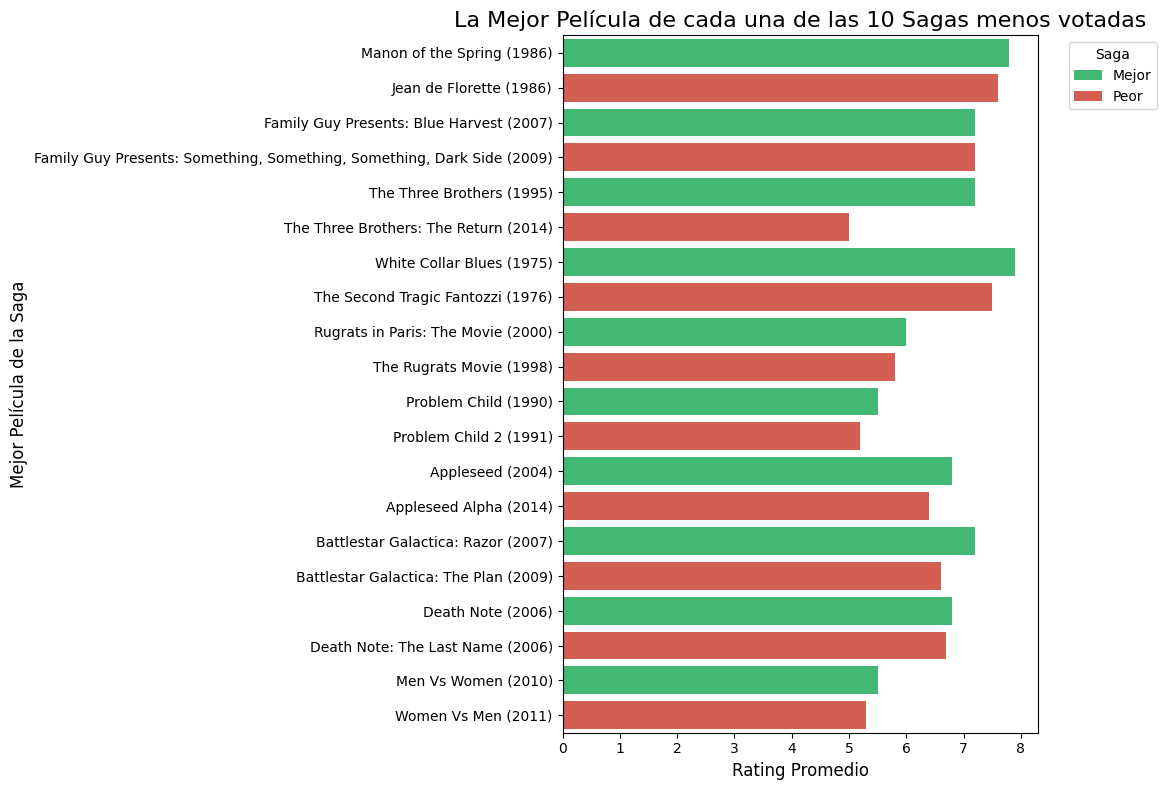

In [552]:
#GRAFICO PARA LAS 10 PELICULAS CON MAS VARIANZA
#Filtramos aquellas peliculas que en sus votos considere la opinion de al menos 100 personas distintas
df_peores = df_peliculas[df_peliculas["vote_count"] > 100] 
df_filtrado = df_peores.groupby("nombre_coleccion").filter(lambda grupo: len(grupo) >= 2)
#desviacion_sagas = df_filtrado.groupby('nombre_saga')['vote_average'].std()
# Agrupamos segun coleccion, tomamos su cantidad de votos de mayor a menor y nos quedamos con las 10 colecciones mas votada
df_top10 = df_filtrado.groupby("nombre_coleccion")["vote_count"].sum().sort_values(ascending=True).head(10)
sagas_top10 = df_top10.index.tolist() # Pasamos los nombres de las colecciones a lista para iterarlas

# Buscamos la mejor pelicula de cada coleccion
lista_peliculas = []
for saga in sagas_top10:
    df_saga = df_filtrado[df_filtrado["nombre_coleccion"] == saga].copy()
    df_saga = df_saga.sort_values("vote_average", ascending=False)
    mejor = df_saga.iloc[0].copy()
    mejor["clasificacion"] = "Mejor" 
    peor = df_saga.iloc[-1].copy()
    peor["clasificacion"] = "Peor"  
    # Formato de título bonito 
    for peli in [mejor, peor]:
        year = str(int(peli["release_date"].year))
        peli["titulo_con_fecha"] = f"{peli["title"]} ({year})"
        lista_peliculas.append(peli)

# Pasamos las mejores peliculas de cada coleccion a un dataframe para graficar
df_grafico_final = pd.DataFrame(lista_peliculas)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="vote_average",   
    y="titulo_con_fecha", 
    data=df_grafico_final,
    palette={"Mejor": "#2ecc71", "Peor": "#e74c3c"},
    hue="clasificacion"
)

plt.title("La Mejor Película de cada una de las 10 Sagas menos votadas", fontsize=16)
plt.xlabel("Rating Promedio", fontsize=12)
plt.ylabel("Mejor Película de la Saga", fontsize=12)
plt.legend(title="Saga", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()




Del mismo modo se observan diferencias minimas similares al anterior grafico. De esto modo se concluye que la popularidad no es factor a considerar para el fracaso de la secuela de una pelicula al no observar diferencias significativas entre los grupos mas votados y los menos votados.

Ahora me parecio interesante ver las colecciones donde en sus precuelas o secuelas hubo un salto grande en cuanto a la calificacion dada de modo que encontremos alguna tendencia que sea identificable

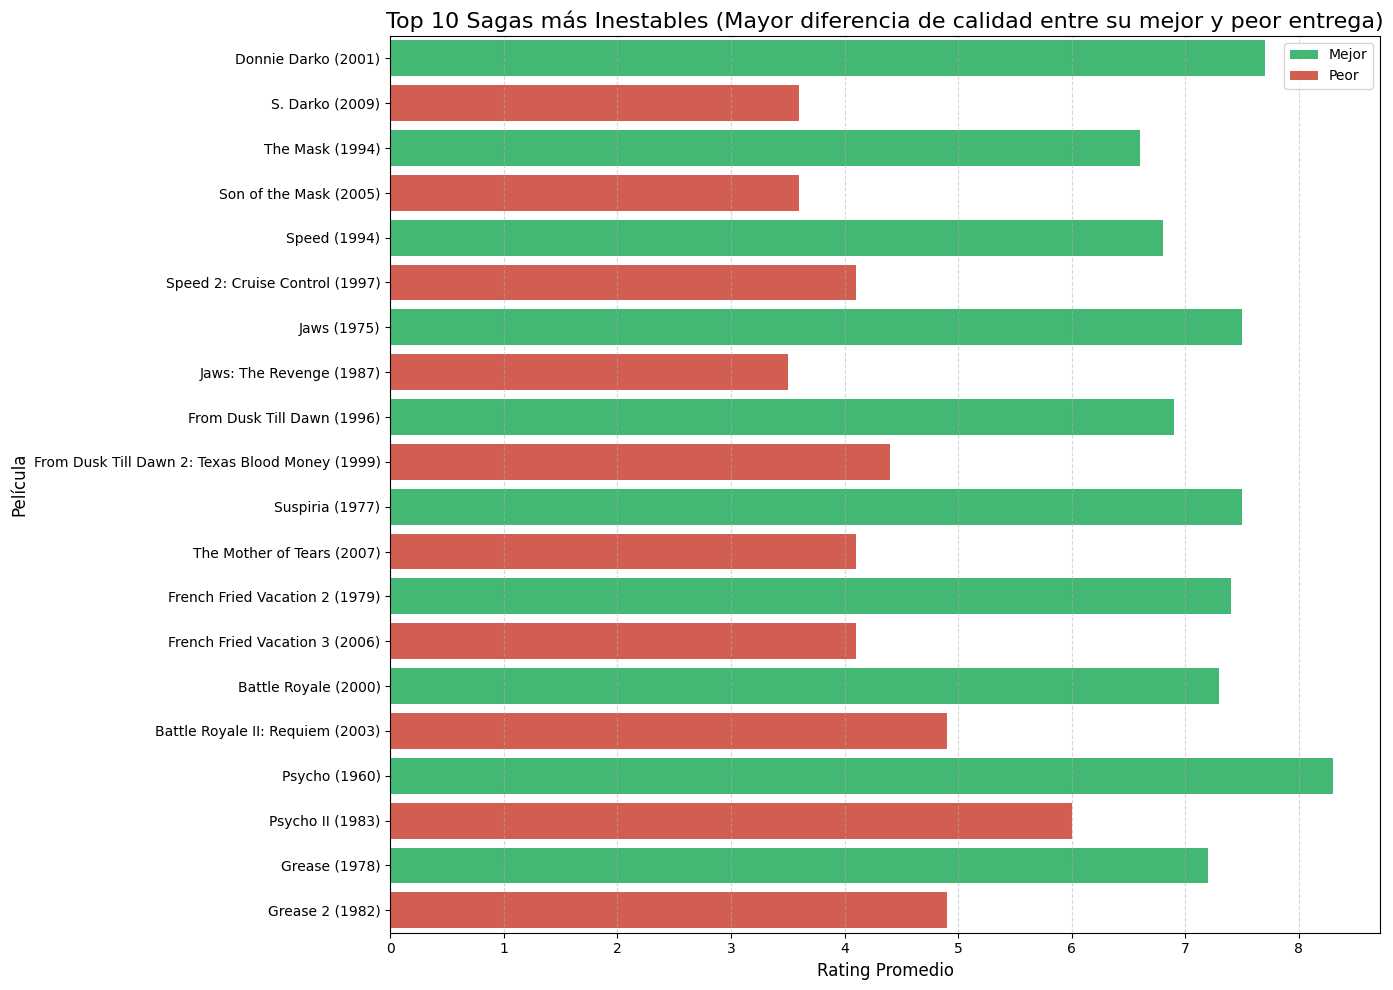

In [553]:
df_calidad = df_peliculas[(df_peliculas["vote_count"] > 100) & (df_peliculas["vote_average"] > 0)].copy()
top_varianza = df_calidad.groupby("nombre_coleccion")["vote_average"].std().sort_values(ascending=False).head(10)
nombres_sagas_inestables = top_varianza.index.tolist()
lista_peliculas = []

for saga in nombres_sagas_inestables:
    df_saga = df_calidad[df_calidad["nombre_coleccion"] == saga].copy()
    df_saga = df_saga.sort_values("vote_average", ascending=False)
    mejor = df_saga.iloc[0].copy()
    mejor["clasificacion"] = "Mejor"
    peor = df_saga.iloc[-1].copy()
    peor["clasificacion"] = "Peor"
    
    for peli in [mejor, peor]:
        year = str(int(peli["release_date"].year))
        peli["titulo_con_fecha"] = f"{peli['title']} ({year})"
        lista_peliculas.append(peli)

df_grafico = pd.DataFrame(lista_peliculas)

plt.figure(figsize=(14, 10))

sns.barplot(
    x="vote_average",   
    y="titulo_con_fecha", 
    data=df_grafico,
    hue="clasificacion",
    palette={"Mejor": "#2ecc71", "Peor": "#e74c3c"} # Verde y Rojo
)

plt.title("Top 10 Sagas más Inestables (Mayor diferencia de calidad entre su mejor y peor entrega)", fontsize=16)
plt.xlabel("Rating Promedio", fontsize=12)
plt.ylabel("Película", fontsize=12)
plt.legend()

# Linea punteada de referencia visual (opcional)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Aun de esta manera no es observable un patron en la decaida de la valorancion de la secuela. Probemos con otros datos

Ahora veamos cual es la calificacion promedio para cada genero de peliculas:

In [554]:
#Primero hagamos explode ya que una sola pelicula puede tener varios generos asociados
df_peliculas1 = df_peliculas.explode("genres")
df_agrupado = df_peliculas1.groupby("genres")["vote_average"].mean()
df_agrupado = pd.DataFrame(df_agrupado)

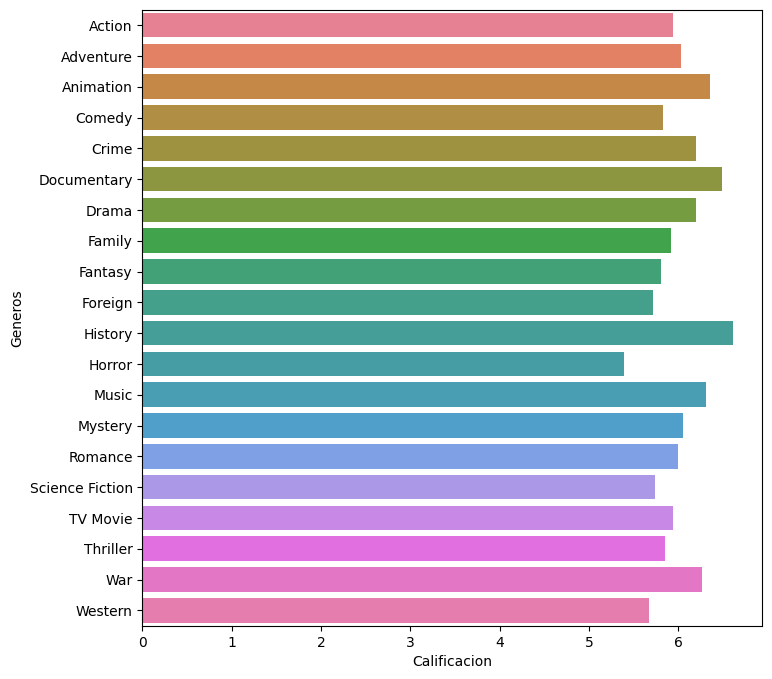

In [555]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_agrupado, x="vote_average", y="genres", hue="genres")
plt.xlabel("Calificacion")
plt.ylabel("Generos")
plt.show()

No observamos alguna tendencia respecto a un solo genero. Solo que el genero que menor valoracion alcanza es el de horror. Ahora hagamos lo mismo pero con la calificacion mas alta obtenida por genero.

In [556]:
df_agrupado1 = df_peliculas1.groupby("genres")["vote_average"].max()
df_agrupado1 = pd.DataFrame(df_agrupado1)

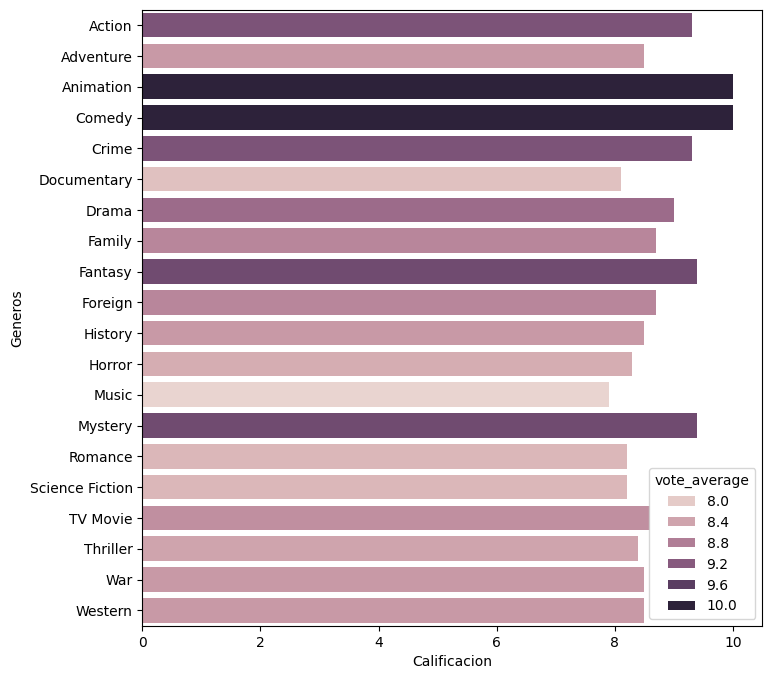

In [557]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_agrupado1, x="vote_average", y="genres", hue="vote_average")
plt.xlabel("Calificacion")
plt.ylabel("Generos")
plt.show()

Notemos que solo los generos de animacion y comedia alcanzaron en algun momento la calificacion maxima lo que los diferencia de todos los demas generos

Ahora analizaremos las fechas de publicacion de las peliculas. Comenzaremos visualizando por cada año, en promedio, por cuales valores se mueven las calificaciones que fueron estrenadas ese año.

In [558]:
df_peliculas["year"] = df_peliculas["release_date"].dt.year # Creamos la nueva columna solo con los años por comodidad
df_peliculas["decada"] = (df_peliculas["year"] // 10) * 10
df_por_año = pd.DataFrame(df_peliculas.groupby("decada")["vote_average"].mean())
# Ahora eliminaremos aquellos años donde su califiacion es igual a 0 ya que no aporta nada y es informacion perdida
df_peliculas = df_peliculas[df_peliculas["decada"] > 0]

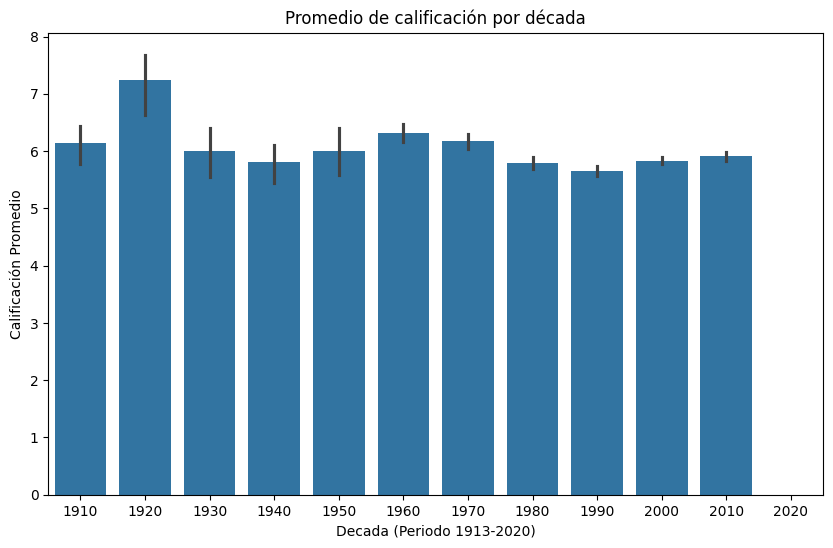

In [559]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_peliculas, x="decada", y="vote_average")
plt.title("Promedio de calificación por década")
plt.xlabel("Decada (Periodo 1913-2020)")
plt.ylabel("Calificación Promedio")
plt.show()

De aca observamos que en la decada de 1920 se alcanzo el mayor promedio de calificaciones para las peliculas estrenadas durante este lapso de tiempo. En los demas años se mantiene un promedio similar.

Dejando un poco de laso el analisis individual nos centraremos en el analisis por coleccion de modo que obtengamos respuestas. Ahora me interese principalmente en las columnas de popularidad y calificacion promedio, pense en si existe una relacion realmente fuerte entre estas ya que no siempre lo mas popular es lo mejor. Es por esto que primero hare un scatterplot para asegurarme que exista una correlacion, luego si todo sale bien me planteare un modelo que a partir de la popularidad, prediga su calificacion promedio o viceversa.

Primero transformamos las columnas para que esten en el mismo formato y podamos trabajar con ambas y ademas creamos el dataframe con la popularidad de cada coleccion en promedio y tambien su calificacion promedio:

In [560]:
df_peliculas["popularity"] = pd.to_numeric(df_peliculas["popularity"], errors='coerce')
df_peliculas["vote_average"] = pd.to_numeric(df_peliculas["vote_average"], errors='coerce')
df_colecciones_pop= pd.DataFrame(df_peliculas.groupby("nombre_coleccion")["popularity"].mean())
df_colecciones_cal = pd.DataFrame(df_peliculas.groupby("nombre_coleccion")["vote_average"].mean())
df_final_coleccion = df_colecciones_pop.merge(df_colecciones_cal, on="nombre_coleccion", how="inner")

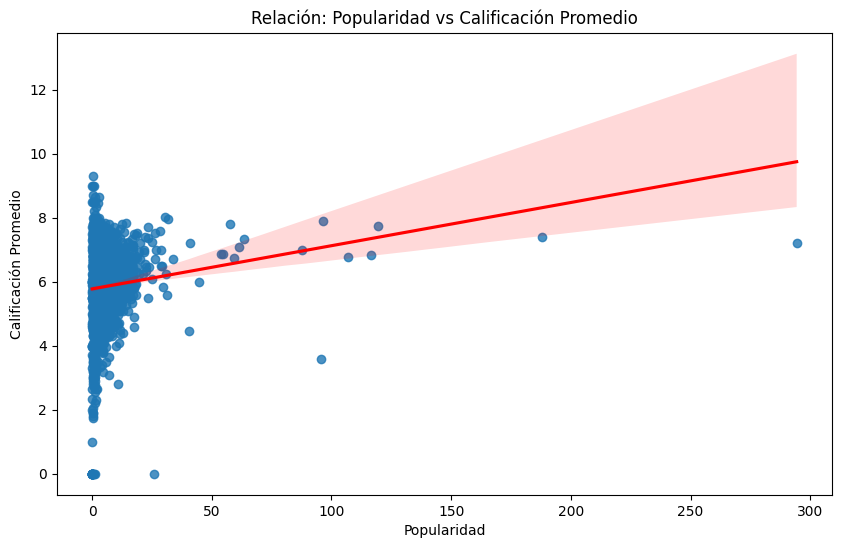

In [561]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_final_coleccion, x="popularity", y="vote_average",line_kws={'color': 'red'})
plt.title("Relación: Popularidad vs Calificación Promedio")
plt.xlabel("Popularidad")
plt.ylabel("Calificación Promedio")
plt.show()

Tal como esperaba, hay outliers. Ajustemos un poco los datos considerando que la popularidad se concentra en el rango de 0 a 100

In [562]:
df_peliculas_ajustado = df_final_coleccion[df_final_coleccion["popularity"] <= 100]


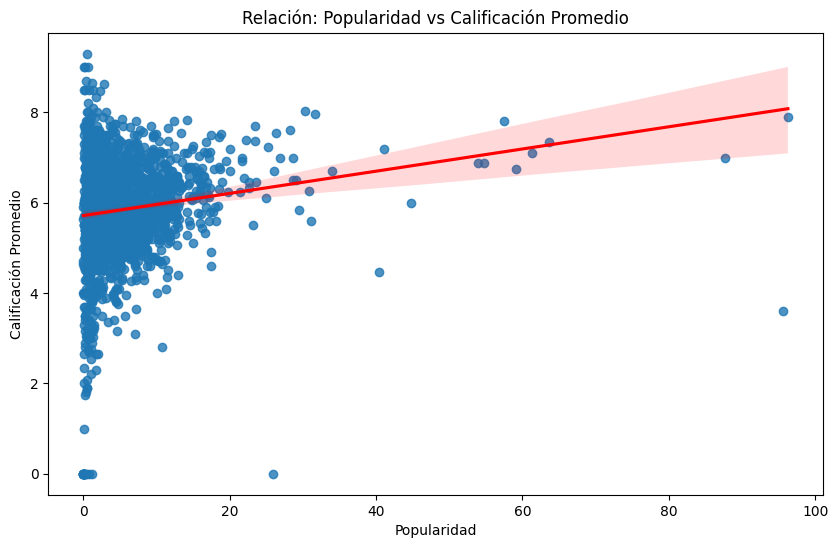

In [563]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_peliculas_ajustado, x="popularity", y="vote_average",line_kws={'color': 'red'})
plt.title("Relación: Popularidad vs Calificación Promedio")
plt.xlabel("Popularidad")
plt.ylabel("Calificación Promedio")
plt.show()

Observamos claramente una fuerte correlacion entre a popularidad y su calificacion promedio por lo que podemos decir de momento que la popularidad y la calificacion promedio de una pelicula tienden a crecer juntos. Lo unico que aun es un poco confuso es la concentracion de popularid en el intervalo de 0-20 pero vemos que en la esquina derecha casi no se reportan bajas calificaciones por lo que es una buena señal.

Ahora siguiendo esta misma idea observemos un scatterplot entre presupuesto en dolares y calificacion de modo que podamos establecer una correlacion entre ambos, despues de todo tiene sentido que a mayor presupuesto mejor sea la pelicula y por consecuente, sea mejor calificada.

Note que hay muchas filas donde el presupuesto de la pelicula es 0 o sea, no hay informacion respecto a el presupuesto de esas peliculas. Trabajaremos solo con la informacion que poseemos (Recordar que la columna "Budget" posee el presupuesto de una pelicula en dolares).

In [564]:
df_peliculas["budget"] = pd.to_numeric(df_peliculas["budget"]) #Transformamos a int ya que por alguna razon estaba en object
df_presupuesto = df_peliculas[df_peliculas["budget"] > 0]

In [565]:
df_presupuesto.min()

title                          101 Dalmatians
release_date              1927-06-04 00:00:00
vote_average                              0.0
vote_count                                  0
popularity                           0.000001
genres                                     []
budget                                      5
revenue                                   0.0
nombre_coleccion    ... Has Fallen Collection
numero_en_saga                              1
year                                     1927
decada                                   1920
dtype: object

Notamos claramente errores en los datos ya que ninguna pelicula puede ser hecha con 5 dolares. Debido a esto aplicaremos un filtro de por lo menos 15.000 dolares de presupuesto

In [566]:
df_presupuesto1 = df_presupuesto[df_presupuesto["budget"] >= 15000] #Condicion
df_presupuesto2 = df_presupuesto1.groupby("nombre_coleccion")["budget"].sum() #Presupuesto por coleccion
df_presupuesto3 = df_presupuesto1.groupby("nombre_coleccion")["vote_average"].mean() #Calificacion promedio por coleccion
df_analisis = pd.concat([df_presupuesto2, df_presupuesto3], axis=1) #Unimos todo

Con nuestro dataframe listo, graficamos:

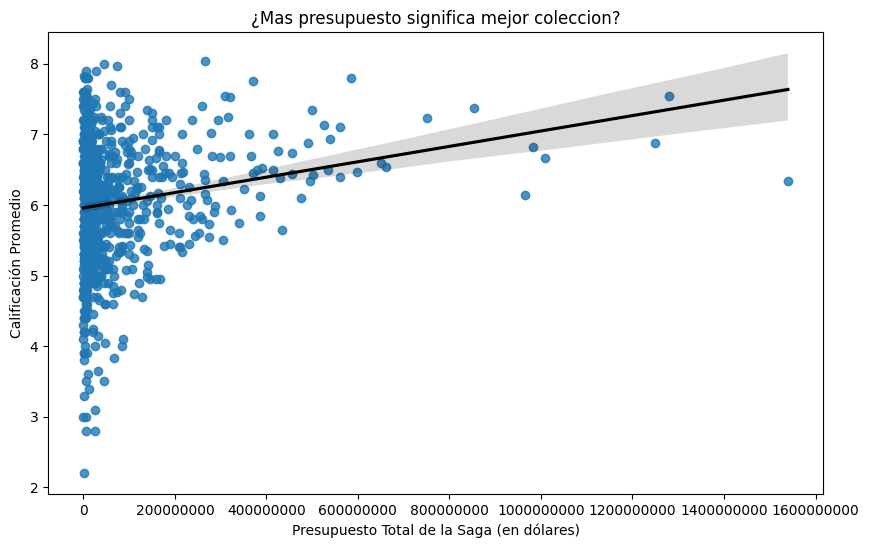

In [567]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_analisis,
            x="budget",
            y="vote_average",
            line_kws={'color': 'black'})            # Línea de tendencia roja

plt.title("¿Mas presupuesto significa mejor coleccion?")
plt.xlabel("Presupuesto Total de la Saga (en dólares)")
plt.ylabel("Calificación Promedio")

# Para que los números del eje X no se vean como 1e8 
plt.ticklabel_format(style='plain', axis='x')

plt.show() 

Tal como se observa existe una gran correlacion entre el presupuesto y la calificacion promedio de una pelicula, aunque aun es muy pronto para decir que un bajo presupuesto es causante de fracaso en las peliculas siguientes.

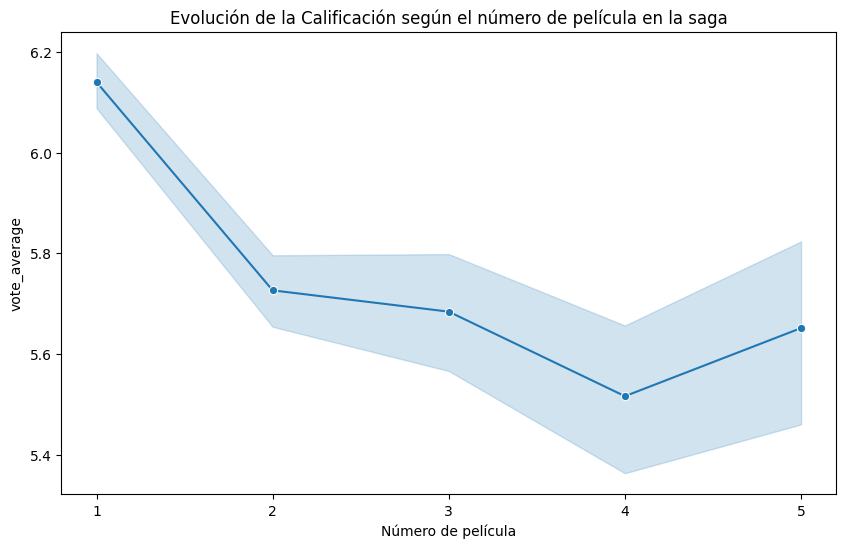

In [568]:
df_plot = df_peliculas[df_peliculas["numero_en_saga"] <= 5] # Para que no colapse el grafico
plt.figure(figsize=(10, 6))
# usamos lineplot para ver la tendencia de caida
sns.lineplot(data=df_plot, x="numero_en_saga", y="vote_average", marker="o")
plt.title("Evolución de la Calificación según el número de película en la saga")
plt.xlabel("Número de película")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

De este modo se evidencia mucho mas el hecho de que luego de la primera entrega de la coleccion de una pelicula su calificacion promedio decae enormemente y nunca vuelve a alcanzar el nivel de la primera. Destacar la mayor caida de calificacion promedio se produce entre la primera y la segunda lo que refuerza aun mas nuestra teoria. Finalmente algo que nos parecio curioso es el alza en la calificacion promedio de la quinta entrega despues de 3 descensos consecutivos.

Siguiendo con esta misma idea ahora me gustaria observar la diferencia de presupuesto entre las primeras entregas que son las que mayor calificacion promedio tienen frente a las demas. Si de verdad existe una diferencia notoria podriamos afirmar que el presupuesto en un factor que determina el exito de la pelicula.

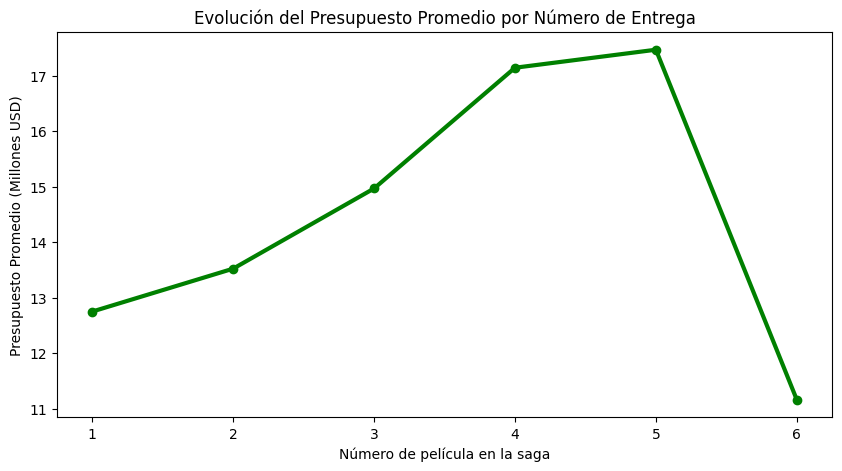

In [569]:
df_top_saga = df_peliculas[df_peliculas["numero_en_saga"] <= 6] # Nos enfocaremos en este caso hasta la 6ta entrega de las colecciones
promedio_presupuesto = df_top_saga.groupby("numero_en_saga")["budget"].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Dividimos por 1 millón para leerlo mejor ya que se veia como 1e10
plt.plot(promedio_presupuesto.index, promedio_presupuesto.values / 1000000, 
         marker='o', linewidth=3, color='green')

plt.title("Evolución del Presupuesto Promedio por Número de Entrega")
plt.xlabel("Número de película en la saga")
plt.ylabel("Presupuesto Promedio (Millones USD)")

plt.show()

Sorprendentemente notamos que el presupuesto aumenta respecto a la primera entrega lo cual contradice la idea de que el presupuesto asegura calidad. Por otro lado notemos que se alcanza un peak en la entrega 5 lo cual responderia el grafico anterior donde se ve que la calificacion de la entrega 5 suele ser la unica que deja de decaer.

Debido a que no obtuvimos grandes respuestas enfoncandonos en el presupuesto ahora me gustaria indagar en la fecha de estreno de cada pelicula considero que una pelicula puede ser percibida o esperada de manera distinta segun cuando se estrena. A continuacion creare nuevas columnas de modo que obtengamos diferencia de fechas entre peliculas :

In [570]:
# Primero ordenamos por colección y fecha para que el calculo sea correcto
df_peliculas = df_peliculas.sort_values(by=["nombre_coleccion", "release_date"])

# calculamos la fecha de la película anterior de la colección
df_peliculas["fecha_anterior"] = df_peliculas.groupby("nombre_coleccion")["release_date"].shift(1)  # método shift dado por gemini al explicarle el contexto y preguntarle como acceder a la pelicula anterior. En pocas palabras shift corre todas las columnas una posición abajo

# calculamos la diferencia en días y luego en años
df_peliculas["diferencia_dias"] = (df_peliculas["release_date"] - df_peliculas["fecha_anterior"]).dt.days
df_peliculas["anos_espera"] = df_peliculas["diferencia_dias"] / 365


Notemos que el codigo de arriba solo sirve para peliculas que su numero de entrega sea por lo menos mayor o igual a 2, si es la entrega original se llenara con NaN. Para analizar y graficar filtraremos aquellos datos:

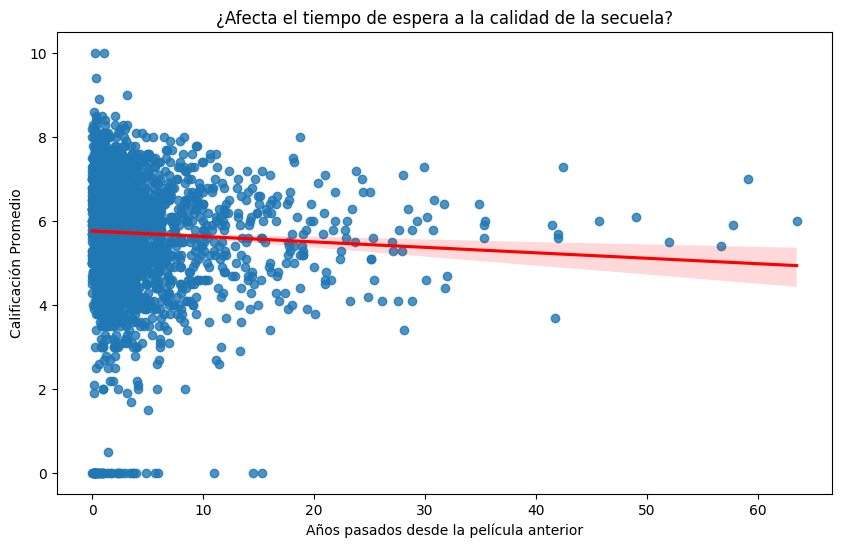

In [571]:
df_fecha_estreno = df_peliculas[df_peliculas["numero_en_saga"] > 1].copy()

plt.figure(figsize=(10, 6))
sns.regplot(data=df_fecha_estreno, x="anos_espera", y="vote_average", line_kws={"color": "red"})

plt.title("¿Afecta el tiempo de espera a la calidad de la secuela?")
plt.xlabel("Años pasados desde la película anterior")
plt.ylabel("Calificación Promedio")
plt.show()

Claramente hay outliers y nuestros datos se concentran bajo los 15 años de espera. Ajustemos los datos :

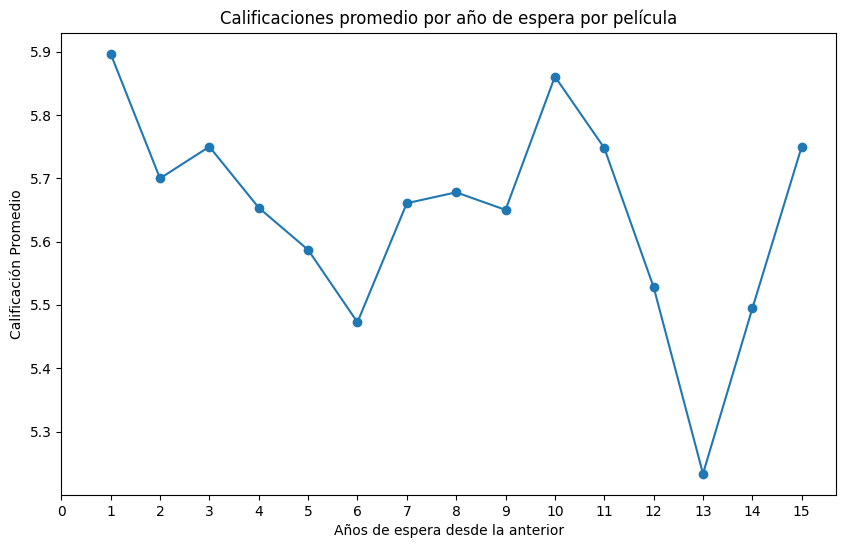

In [572]:

df_zoom = df_fecha_estreno[
    (df_fecha_estreno["vote_average"] > 0) &  # Nos quedamos con aquellas calificaciones promedio mayores a 0 y con máximo 15 años de espera
    (df_fecha_estreno["anos_espera"] >= 1) & (df_fecha_estreno["anos_espera"] <= 15)
].copy()

df_zoom["anios_redondeados"] = df_zoom["anos_espera"].round()

# 3. Calculamos el promedio de calidad por año de espera
tendencia_tiempo = df_zoom.groupby("anios_redondeados")["vote_average"].mean()

plt.figure(figsize=(10, 6))

plt.plot(
    tendencia_tiempo.index,
    tendencia_tiempo.values,
    marker="o"
)
plt.title("Calificaciones promedio por año de espera por película")
plt.xlabel("Años de espera desde la anterior")
plt.ylabel("Calificación Promedio")
plt.xticks(range(0, 16))  # 15 años
plt.show()

Finalmente llegamos a una respuesta real, el tiempo de espera entre peliculas si dictamina su calificacion en la gente. Primero que nada notemos que las calificaciones promedio mas altas se logran cuando el tiempo de espera es menor o igual a un año o simplemente cuando hay rodaje simultaneo, mientras que el periode de de entre 10-13 años es el peor momento para lanzar una secuela de tu pelicula. Luego de ese tiempo las calificaciones respecto a la anterior entrega suben exponencialmente indicando lo que podria ser una especie de nostalgia debido al tiempo transcurrido. Con esta visualizacion podriamos concluir que uno de los factores que afectan a las secuelas de las colecciones es el tiempo entre peliculas lo que podria conllevar a altas expectativas y mayor rigor por parte de los espectadores.

Ahora en busqueda de mas factores exploremos en la columna de ganancia ("renueve") donde se observa la ganancia de las entregas respecto a los años de espera con la anterior de este modo mas que evidenciar el exito de calidad en las calificaciones, observaremos el exito comercial en ventas.

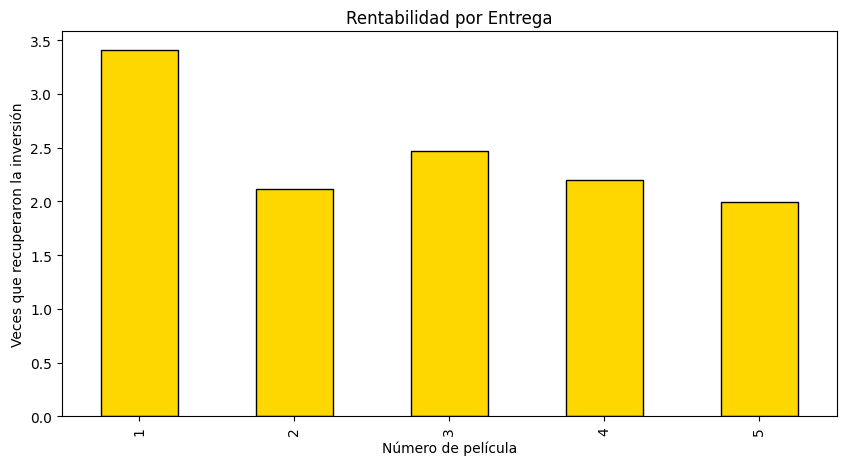

In [573]:
df_dinero = df_peliculas[(df_peliculas['budget'] > 10000) & (df_peliculas['revenue'] > 10000)].copy()

# Fórmula: (Ganancia - Gasto) / Gasto Dada por gemini al consultar sobre la rentabilidad neta de una pelicula me dio esta formula
df_dinero['roi'] = (df_dinero['revenue'] - df_dinero['budget']) / df_dinero['budget']

roi_por_saga = df_dinero.groupby('numero_en_saga')['roi'].median() # Usamos mediana porque los promedios engañan en dinero

plt.figure(figsize=(10, 5))
# nos quedamos con las primeras 5 ya que con mas abarcamos outliers
roi_por_saga.head(5).plot(kind='bar', color='gold', edgecolor='black')

plt.title('Rentabilidad por Entrega')
plt.xlabel('Número de película')
plt.ylabel('Veces que recuperaron la inversión')
plt.show()

Aqui se observa como a pesar de todas las rentabilidades de las peliculas decaen luego de la 1era esto es completamente normal ya que recordemos que en los graficos anteriores se observo como en las secuelas de las peliculas se invierte mucho mas. Por otro lado en todas se observa una rentabilidad de por lo menos el doble de la inversion lo que explica la produccion de mas y mas peliculas.

## 3. Regresion Lineal
- Elegí Regresión Lineal porque mi objetivo era cuantificar la tendencia general de la caída de calidad a lo largo del tiempo

In [574]:
#No encontre relaciones optimas 

## 4. Conclusion final

En conclusion, después de revisar todos los datos y los gráficos que sacamos, se puede confirmar que lo de la "maldición de las segundas partes" es verdad. Casi siempre las secuelas tienen peor nota que la primera, pero lo interesante fue ver por qué pasa esto, porque no era lo que pensábamos al principio.

Primero, creíamos que las películas salían malas porque les daban menos presupuesto, pero los datos mostraron que es al revés. A las secuelas les meten más plata (sobre todo a la 5ta), pero igual la gente las evalúa peor. O sea, tener más dinero no arregla un mal guion.

Lo que sí nos dimos cuenta es que el tiempo influye mucho. En el gráfico se veía claro que las mejores son las que se graban casi juntas (0 años de espera). Si se apuran y la sacan al año siguiente, la nota baja harto, yo creo que por hacerla a la rápida. Y si esperan mucho, como 6 años, también les va mal porque a la gente ya se le olvidó la saga.

Para terminar, la pregunta era por qué las siguen haciendo si son malas. Y la respuesta está en la columna de ganancia que vimos al final. Aunque la película sea mala y tenga peor nota, sigue dando el doble de plata de lo que costó . Así que los estudios las hacen porque es negocio seguro, no porque quieran hacer buen cine.